In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from Utility.plot_utility import plot_mean_bar_graph
from Utility.plot_utility_anova import plot_mean_bar_graph_3candidates

In [2]:
def read_data(file_path):
    full_path = os.path.join('..', 'Cleaned Data', file_path)

    return pd.read_json(full_path, lines=True)

In [36]:
df1 = read_data('one/part-00000-9076dc6d-fa59-4c36-a0cf-8808e309da7b-c000.json.gz')
df2 = read_data('two/part-00000-c7cf2076-eae1-4d0c-bce1-e7b0c43a3bf1-c000.json.gz')
df3 = read_data('three/part-00000-662e59e6-5ee7-48da-a85f-1bcf09724f97-c000.json.gz')
df4 = read_data('four/part-00000-3060ac52-6be0-4d42-a322-3e4a7954a4f4-c000.json.gz')
df5 = read_data('five/part-00000-9c42996a-80d4-4a96-b59b-228f5e241a65-c000.json.gz')
df6 = read_data('six/part-00000-5da94b81-55c0-42e7-b3dc-5a51a14e8589-c000.json.gz')
df7 = read_data('seven/part-00000-eb573e13-d85e-400c-b3db-ffa9bd2d5543-c000.json.gz')
df8 = read_data('eight/part-00000-61526e86-ba2d-4df5-a9d1-d043ca875b62-c000.json.gz')
df9 = read_data('nine/part-00000-dc7c0356-fae4-47b8-a93a-f9b401cf70f0-c000.json.gz')
df10 = read_data('ten/part-00000-f3ae3925-50c4-469e-8304-6007e9b4cdab-c000.json.gz')
df11 = read_data('eleven/part-00000-2aa1781a-723e-49c4-a488-47ca50409657-c000.json.gz')
df12 = read_data('twelve/part-00000-7ff282ff-fa5e-494c-ab5c-59f07d2a2f0d-c000.json.gz')

frames = [df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(frames, ignore_index=True)

df;

In [4]:
# Filter out unnecessary columns
columns = [
    'subreddit',
    'score',
]

df = df[columns]

df = df.sort_values('score')

#341418 rows
df;

In [5]:
# Drop rows with NaN as subreddit name

mask = df['subreddit'].isna()

df.drop(df[mask].index, inplace=True)

#341199 rows
df;

In [6]:
# Group by subreddit and count the number of posts

subreddit_popularity = df.groupby('subreddit').size()

subreddit_popularity = subreddit_popularity.sort_values()

#25047 rows
subreddit_popularity

subreddit
zzt                         1
panamacity                  1
StreamlineGame              1
palmsprings                 1
StreetOutlaws               1
                        ...  
Overwatch                2781
dota2LeagueMatches       3084
RocketLeagueExchange     3477
Fireteams                5321
GlobalOffensiveTrade    10583
Length: 26063, dtype: int64

In [7]:
# Dobule check # of unique subreddits

num_unique_subreddits = df['subreddit'].nunique()

print(f'There are {num_unique_subreddits} unique subreddits')

There are 26063 unique subreddits


In [35]:
df['subreddit_popularity'] = df['subreddit'].map(subreddit_popularity)

df = df.sort_values('subreddit_popularity')

df;

In [9]:
# Separate scores by low/high subreddit popularity/size

median_subreddit_popularity = df['subreddit_popularity'].median()

high_subreddit_popularity_score = df[df['subreddit_popularity'] > median_subreddit_popularity]['score']
low_subreddit_popularity_score = df[df['subreddit_popularity'] <= median_subreddit_popularity]['score']

high_subreddit_popularity_score

162020    2703
17083        2
273716       3
278220       1
149785       3
          ... 
98986        1
141438       1
142807       1
261014       1
221322       1
Name: score, Length: 149746, dtype: int64

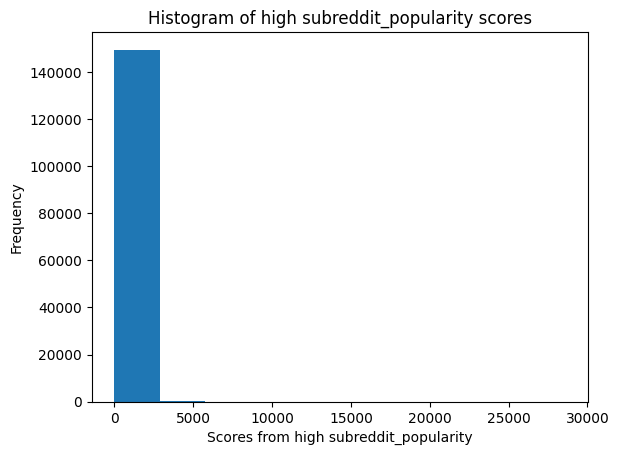

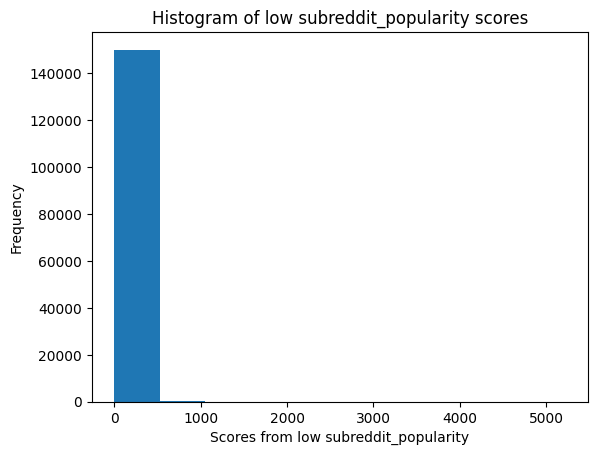

In [10]:
# Test if high_score_comments and low_score_comments have similar distribution

plt.hist(high_subreddit_popularity_score, bins=10)
plt.xlabel('Scores from high subreddit_popularity')
plt.ylabel('Frequency')
plt.title('Histogram of high subreddit_popularity scores')
plt.show()

plt.hist(low_subreddit_popularity_score, bins=10)
plt.xlabel('Scores from low subreddit_popularity')
plt.ylabel('Frequency')
plt.title('Histogram of low subreddit_popularity scores')
plt.show()

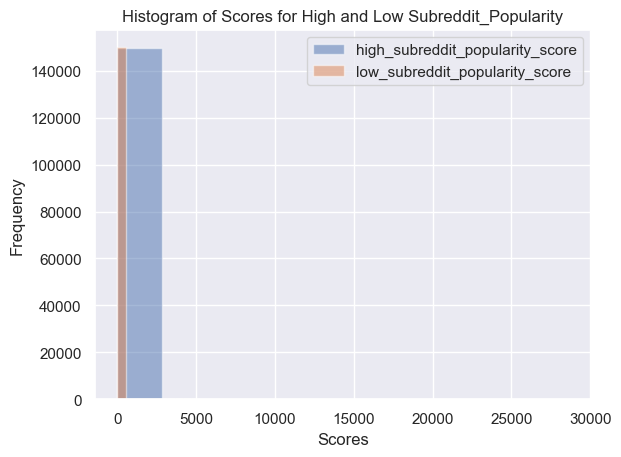

In [34]:
# Plot the histograms for high_subreddit_popularity_score and low_subreddit_popularity_score on the same plot

plt.hist(high_subreddit_popularity_score, bins=10, alpha=0.5, label='high_subreddit_popularity_score')
plt.hist(low_subreddit_popularity_score, bins=10, alpha=0.5, label='low_subreddit_popularity_score')

plt.xlabel('Scores')
plt.ylabel('Frequency')
plt.title('Histogram of Scores for High and Low Subreddit_Popularity')
plt.legend(loc='upper right')
plt.show()


In [12]:
'''
Note to self:

Since both high_score_comments and low_score_comments have similar distribution
Proceed with Mann-Whitney U Test
'''

'\nNote to self:\n\nSince both high_score_comments and low_score_comments have similar distribution\nProceed with Mann-Whitney U Test\n'

In [32]:
# Perform Mann-Whitney U Test
# p-value < 0.05 indicates distributions are not equal between two sets of data

statistic, p_value = stats.mannwhitneyu(high_subreddit_popularity_score, low_subreddit_popularity_score)

def interpret_mannwhitneyu(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the two groups are significantly different:\n the popularity of subreddits may have an impact on the score of a post"
    else:
        return "The distributions of the two groups are not significantly different:\n the popularity of subreddits does not have a significant impact on the score of a post"


print(f'Mann-Whitney U test statistic: {statistic}, p-value: {p_value}')
print(interpret_mannwhitneyu(p_value))

Mann-Whitney U test statistic: 8822293753.0, p-value: 0.0
The distributions of the two groups are significantly different:
 the popularity of subreddits may have an impact on the score of a post


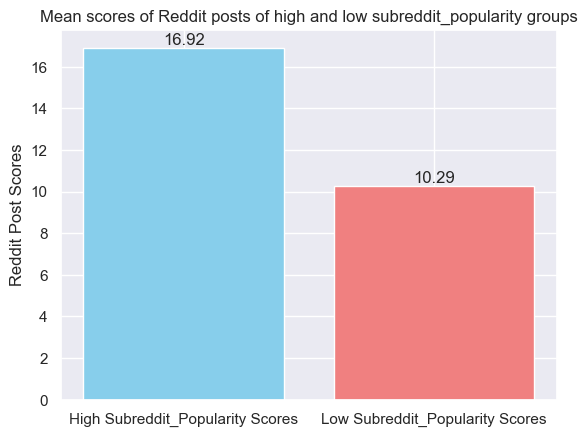

In [15]:
# Plot mean scores of high/low subreddit_populartity
plot_mean_bar_graph(high_subreddit_popularity_score,
                    low_subreddit_popularity_score, 
                    'Mean scores of Reddit posts of high and low subreddit_popularity groups', 
                    ['High Subreddit_Popularity Scores', 'Low Subreddit_Popularity Scores'], 
                    'Reddit Post Scores', 
                    '../Graphs/subreddit_popularity.png')

In [31]:
# Perform a normality test on the subreddit_popularity

statistic, p_value = stats.normaltest(df['subreddit_popularity'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column subreddit_popularity is not normally distributed (p-value < 0.05).")
else:
    print("The column subreddit_popularity is approximately normally distributed (p-value >= 0.05).")

p_value: 0.0
The column subreddit_popularity is not normally distributed (p-value < 0.05).


Text(0.5, 1.0, 'Histogram of subreddit_popularity')

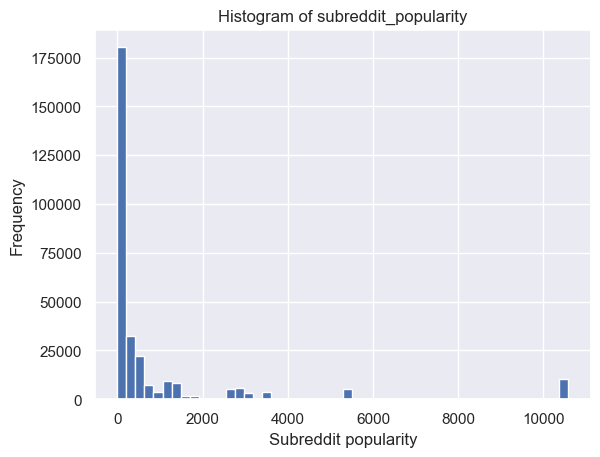

In [17]:
# Rough eye test of subreddit_popularity distribution

plt.hist(df['subreddit_popularity'], bins=50)
plt.xlabel('Subreddit popularity')
plt.ylabel('Frequency')
plt.title('Histogram of subreddit_popularity')

In [18]:
# Transform subreddit_popularity

'''
.exp results in inf subreddit_popularity
.square results in left-skewed histogram
.log results in somewhat normal histogram
.sqrt results in semi left-skewed histogram
'''
#df['subreddit_popularity_exp'] = np.exp(df['subreddit_popularity']) 
df['subreddit_popularity_square'] = np.square(df['subreddit_popularity'])
df['subreddit_popularity_log'] = np.log(df['subreddit_popularity'] + 1) 
df['subreddit_popularity_sqrt'] = np.sqrt(df['subreddit_popularity'])

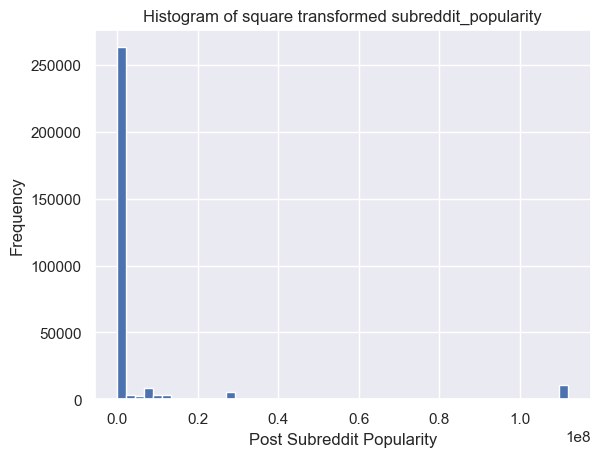

In [19]:
plt.hist(df['subreddit_popularity_square'], bins=50)
plt.xlabel('Post Subreddit Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of square transformed subreddit_popularity')
plt.show()

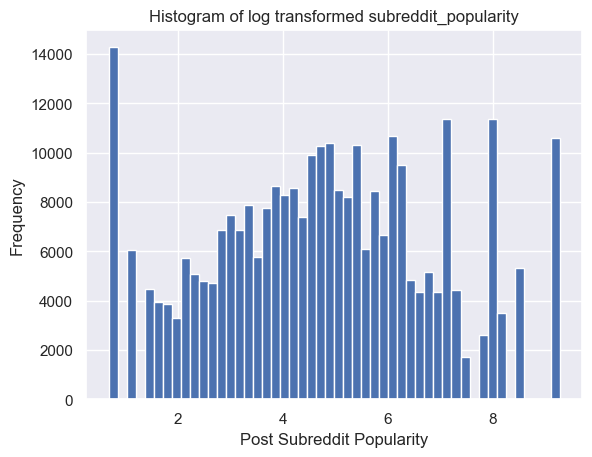

In [20]:
plt.hist(df['subreddit_popularity_log'], bins=50)
plt.xlabel('Post Subreddit Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of log transformed subreddit_popularity')
plt.show()

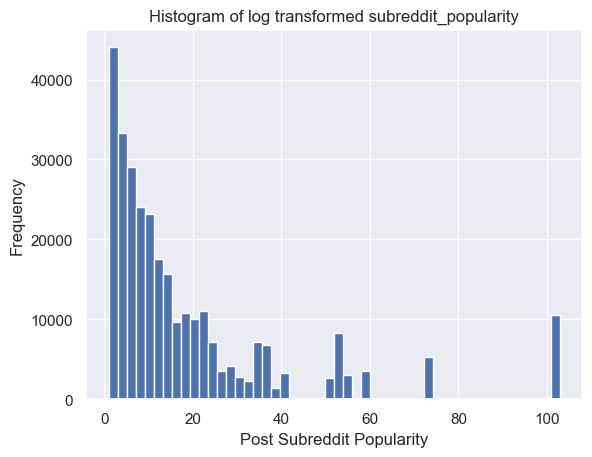

In [30]:
plt.hist(df['subreddit_popularity_sqrt'], bins=50)
plt.xlabel('Post Subreddit Popularity')
plt.ylabel('Frequency')
plt.title('Histogram of log transformed subreddit_popularity')
plt.show()

In [29]:
'''
Note to self:

subreddit_popularity_log is normal enough for the eye test
Verify with normal test again
'''

# Perform a normality test on subreddit_popularity

statistic, p_value = stats.normaltest(df['subreddit_popularity_log'])

print(f'p_value: {p_value}')

# Print the normality test result
if p_value < 0.05:
    print("The column subreddit_popularity_log is not normally distributed (p-value < 0.05).")
else:
    print("The column subreddit_popularity_log is approximately normally distributed (p-value >= 0.05).")

p_value: 0.0
The column subreddit_popularity_log is not normally distributed (p-value < 0.05).


In [23]:
# Separate scores by low, medium, high subreddit_popularity

df['subreddit_category'] = pd.qcut(df['subreddit_popularity_log'], 3, labels=['low', 'medium', 'high'])

low_popularity = df[df['subreddit_category'] == 'low']['score']
medium_popularity = df[df['subreddit_category'] == 'medium']['score']
high_popularity = df[df['subreddit_category'] == 'high']['score']

low_popularity, medium_popularity, high_popularity;

In [28]:
# Perform one-way ANOVA

statistic, p_value = stats.f_oneway(low_popularity, medium_popularity, high_popularity)

print(f'ANOVA one-way test statistic: {statistic}, p-value: {p_value}')

def interpret_anova(p_value, alpha=0.05):
    if p_value < alpha:
        return "The distributions of the three groups are significantly different:\n the popularity of subreddits may have an impact on the score of a post"
    else:
        return "The distributions of the three groups are not significantly different:\n the popularity of subreddits does not have a significant impact on the score of a post"

print(interpret_anova(p_value))

ANOVA one-way test statistic: 131.7506596704363, p-value: 6.405155610527879e-58
The distributions of the three groups are significantly different:
 the popularity of subreddits may have an impact on the score of a post


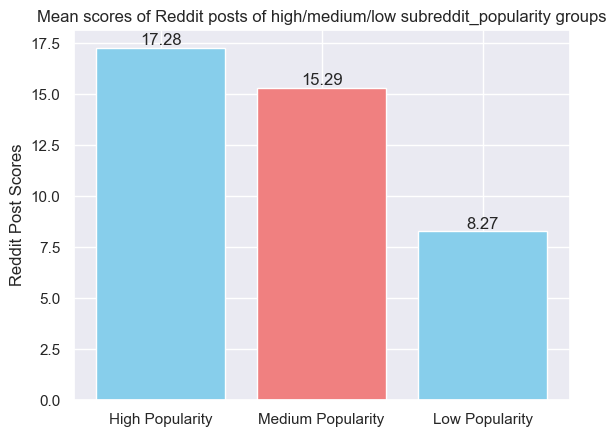

In [27]:
# Plot mean scores of high/medium/low subreddit_popularity
plot_mean_bar_graph_3candidates(high_popularity,
                    medium_popularity, 
                    low_popularity,
                    'Mean scores of Reddit posts of high/medium/low subreddit_popularity groups', 
                    ['High Popularity', 'Medium Popularity', 'Low Popularity'], 
                    'Reddit Post Scores', 
                    '../Graphs/subreddit_popularity_anova.png')